# PRIMA DI AVVIARE IL CODICE

Istruzioni per gestire il dataset

1. scaricare il file "winemag-data-130k-v2.csv" al link sottostante

[Link Kaggle dataset](https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data-130k-v2.csv)

2. Inserire in una cartella il file SebastianoFabbriPython e il dataset scaricato

# <center><b> PROGETTO PYTHON con PANDAS</b>

# <center><b> Partendo da un dataset di recensioni di vini, analizziamo i dati e creiamo una strategia per an'attività di vendita online</b>

In [2]:
# importiamo le librerie che ci servono per esplorare i dati e visualizzarli tramite grafici

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row', None)

%matplotlib inline

In [3]:
# assegnamo il dataset ad una variabile

df = pd.read_csv('./winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## <strong><span style="color:green">Exploratory Data Analysis</span></strong>

In [4]:
# numero righe e colonne del df
df.shape

(129971, 14)

In [5]:
# informazioni sul tipo di dati del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


>3 colonne con osservazioni numeriche

>le restanti invece con osservazioni categoriche

In [6]:
# controlliamo se ci sono osservazioni ripetute

df[df.duplicated()].sum()

Unnamed: 0               0.0
country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
region_2                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64

In [7]:
# percentuale valori mancanti
# alcune colonne verranno eliminate più avanti

missing_val_count = df.isnull().sum()/len(df)*100
missing_val_count.round(2)

Unnamed: 0                0.00
country                   0.05
description               0.00
designation              28.83
points                    0.00
price                     6.92
province                  0.05
region_1                 16.35
region_2                 61.14
taster_name              20.19
taster_twitter_handle    24.02
title                     0.00
variety                   0.00
winery                    0.00
dtype: float64

<Figure size 720x432 with 0 Axes>

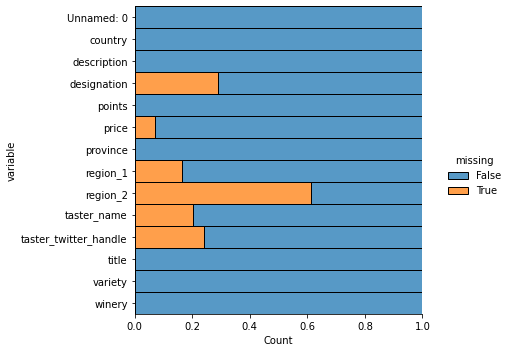

In [8]:
#Visualizing missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)
plt.show()

In [9]:
# troviamo elementi unici nelle colonne selezionate
col = ['country','variety']

for i in col:
    print('Totale valori unici in', i,':', df[i].nunique())

Totale valori unici in country : 43
Totale valori unici in variety : 707


In [10]:
# descrizione statistica dei valori categorici e numerici

df.describe(include='all')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129971.000000,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,NaN,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,NaN,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,NaN,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,64985.000000,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37519.540256,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32492.500000,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,64985.000000,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,97477.500000,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>Nella colonna 'price' notiamo una media di 35.36 con deviazione standard di 41.02. Ci aspettiamo una concentrazione dei valori abbastanza vicini alla media. Più avanti cercheremo di visualizzarli e controllare la presenza di valori anomali <br>
>Per quanto riguarda il punteggio abbiamo una media di 88.44 con deviazione standard di 3.04, quindi avremo dei valori molto simili tra di loro <br>

>Per la colonna country il valore più presente è US <br>
>Per la colonna variety il valore più presente è Pinot Noir

>Da notare che il 75% dei dati ha un prezzo uguale o inferiore a 42$ <br>
>Ci aspettiamo molti outlier

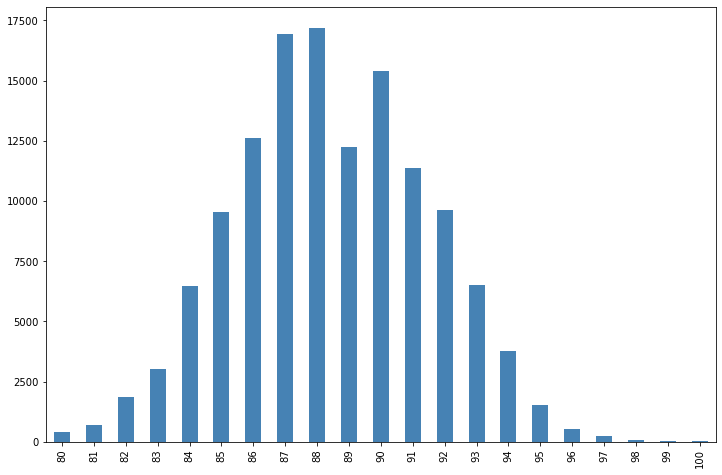

In [11]:
# distribuzione valori colonna 'points'

fig = plt.subplots(figsize =(12, 8))
df['points'].value_counts().sort_index().plot.bar(color='steelblue')
plt.show()

>Distribuzione unimodale dei dati. <br>
>Media, moda, mediana dovrebbero essere simili tra loro

In [12]:
print('media :     ', df['points'].mean())
print('mediana :   ', df['points'].median())
print('moda : ', df['points'].mode())

media :      88.44713820775404
mediana :    88.0
moda :  0    88
dtype: int64


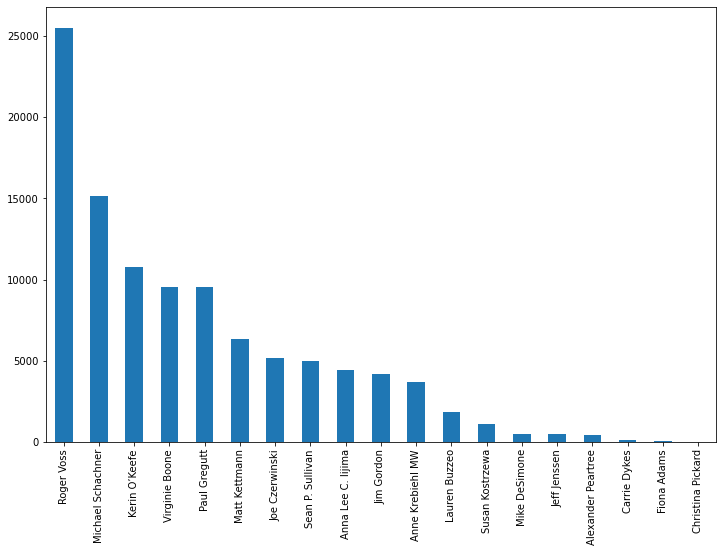

In [13]:
# visualizzazione numero review per taster_name

fig = plt.subplots(figsize =(12, 8))
df.taster_name.value_counts().plot(kind='bar')
plt.show()

In [14]:
# raggruppo le review dei tester per country
df.groupby(['taster_name'])['country'].value_counts()

taster_name         country               
Alexander Peartree  US                          415
Anna Lee C. Iijima  US                         2435
                    Germany                    1759
                    Romania                      41
                    Croatia                      39
                    Hungary                      32
                    Slovenia                     26
                    Georgia                      22
                    Bulgaria                     19
                    Canada                       15
                    Lebanon                      10
                    Turkey                        5
                    Czech Republic                4
                    Morocco                       2
                    Ukraine                       2
                    Bosnia and Herzegovina        1
                    Macedonia                     1
                    Moldova                       1
                    S

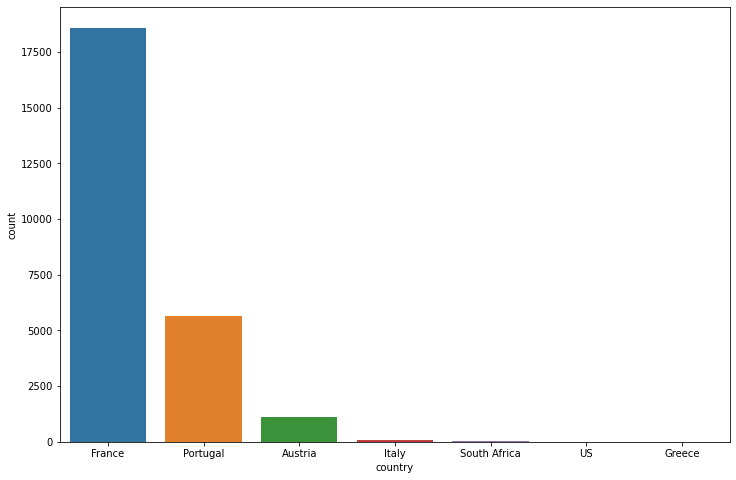

In [15]:
# visualizziamo i voti del taster che ha più recensioni
roger_voss = df[df['taster_name']=='Roger Voss']

plt.figure(figsize=(12,8))
sns.countplot(x="country", data=roger_voss.sort_index(ascending=False))

plt.show()

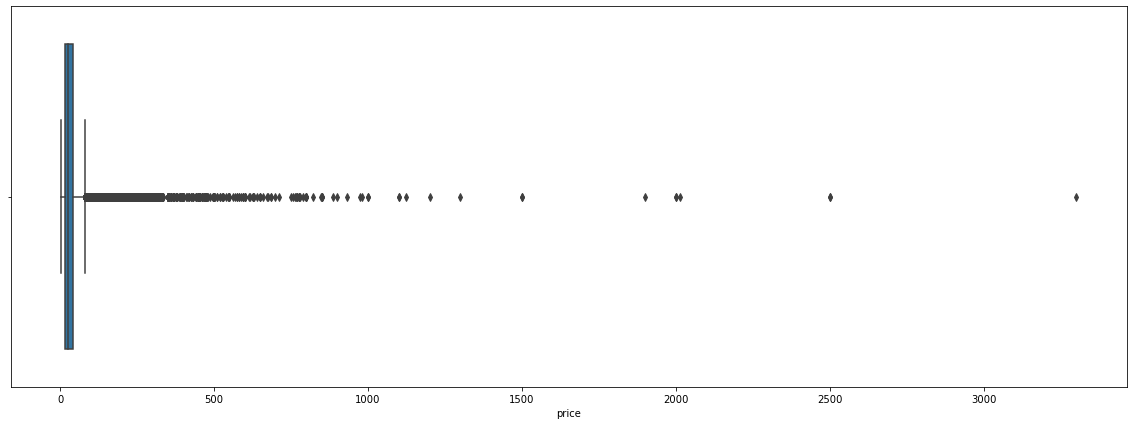

In [16]:
# distribuzione valori colonna 'price'

fig, ax = plt.subplots(figsize = (20,7))
sns.boxplot(x=df["price"])
plt.show()

>Ci sono molti outlier. Prendiamo in considerazione il valore più alto per vedere se è un errore o se effettivamente è riportato correttamente

In [17]:
df[df['price']==3300]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


>il valore è corretto <br>
>(https://www.winemag.com/?s=Ch%C3%A2teau+les+Ormes+Sorbet+2013+M%C3%A9doc&search_type=all)

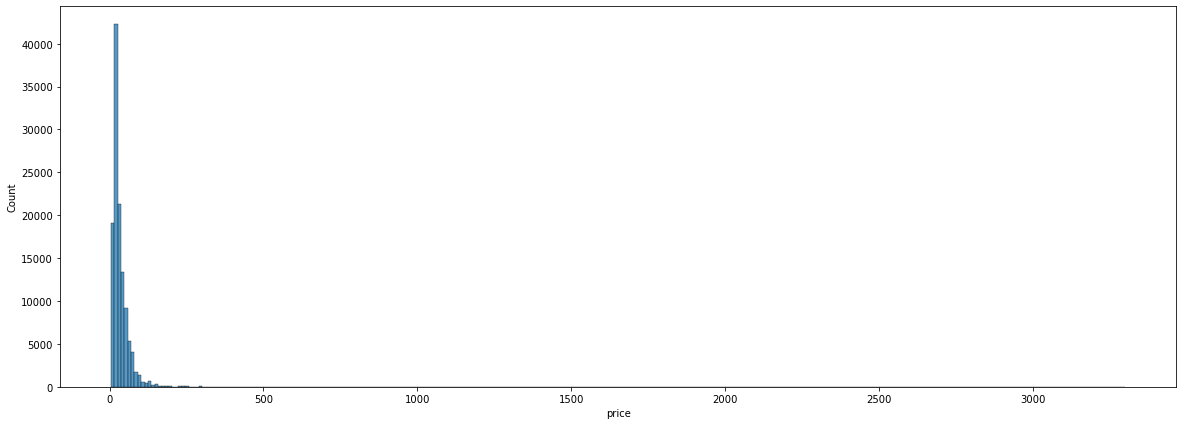

In [18]:
# distribuzioni valori per la colonna price

fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(df['price'], bins=300)
plt.show()

>Come visto in precedenza, la maggior parte dei valori si concentrano in un range ristretto. Analizzeremo più avanti i valori che si spostano dalla media

### Pulizia df

>Vogliamo ottenere informazioni relative al prezzo, varieta, country, punteggio. <br>
>Possiamo eliminare le colonne che al momento non ci servono

In [19]:
df.drop(['Unnamed: 0', 'description', 'designation', 'province', 'region_1', 'region_2',
       'taster_twitter_handle'], axis=1, inplace=True)

>Per avere un'analisi più accurata dei dati, decidiamo di eliminare i gli stati che hanno meno di 100 osservazioni

In [43]:
df = df.groupby('country').filter(lambda x : len(x)>100)

>Stesso ragionamento per la colonna variety

In [21]:
df = df.groupby('variety').filter(lambda x : len(x)>100)

>Verifichiamo se c'è qualche tipo di correlazione tra i dati che abbiamo 

>Trasformiamo i valori categorici delle colonne country e variety in valori numerici


In [22]:
df['country_n'] = pd.factorize(df['country'])[0]
df['variety_n'] = pd.factorize(df['variety'])[0]
df['taster_name_n'] = pd.factorize(df['taster_name'])[0]
df['winery_n'] = pd.factorize(df['winery'])[0]

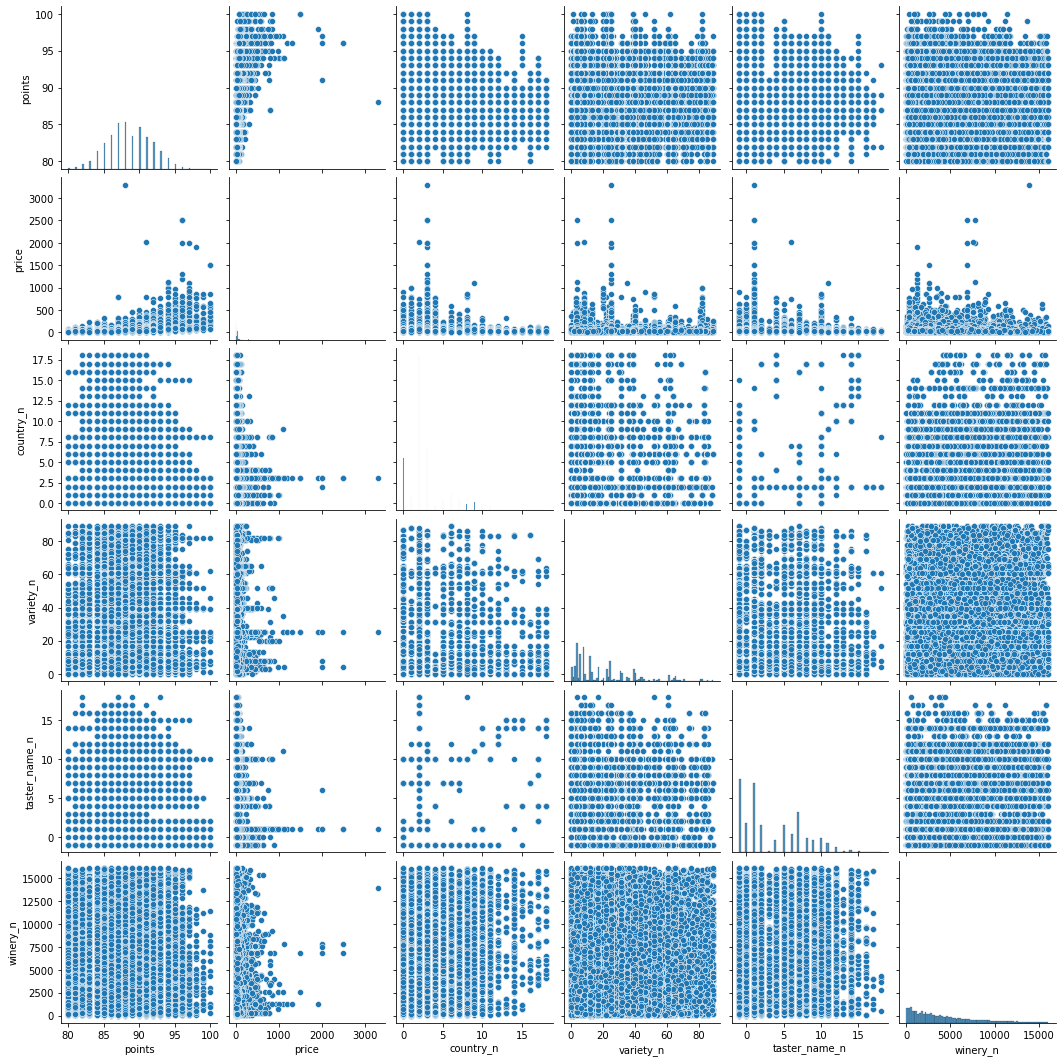

In [23]:
sns.pairplot(df)
plt.show()

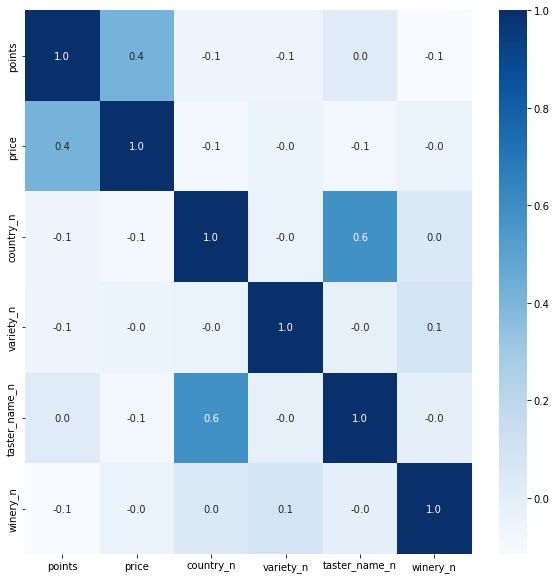

In [24]:
#heatmap for correlation
correlation_matrix = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.show()                                                                          

>Correlazione debole tra prezzo e punti <br>
>Correlazione moderata tra tester e country

In [26]:
# analizziamo i valori della colonna 'country'
df.country.value_counts()

US              53109
France          21141
Italy           17885
Spain            5631
Portugal         4999
Chile            4267
Argentina        3630
Austria          2865
Australia        2135
Germany          1966
New Zealand      1407
South Africa     1349
Israel            461
Canada            228
Greece            211
Bulgaria          123
Romania           106
Uruguay            99
Hungary            54
Name: country, dtype: int64

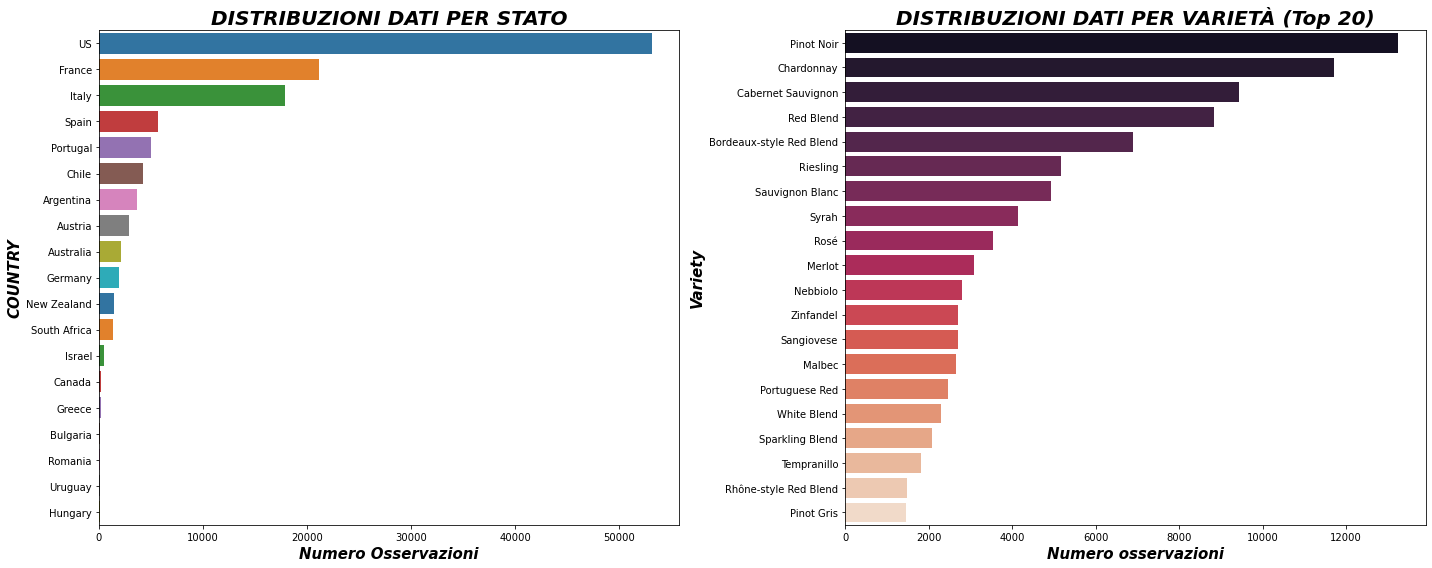

In [27]:
# visualizzazione valori colonna country e variety

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))


sns.countplot(ax=ax1, y="country", data=df, palette="tab10", order = df['country'].value_counts().index)
sns.countplot(ax=ax2, y="variety", data=df, palette='rocket', order = df['variety'].value_counts().index[:20])

ax1.set_title('DISTRIBUZIONI DATI PER STATO', size=20, fontstyle='italic', weight=900)
ax1.set_xlabel('Numero Osservazioni', size=15, fontstyle='italic', weight=900)
ax1.set_ylabel('COUNTRY', size=15, fontstyle='italic', weight=900)

ax2.set_title('DISTRIBUZIONI DATI PER VARIETÀ (Top 20)', size=20, fontstyle='italic', weight=900)
ax2.set_xlabel('Numero osservazioni', size=15, fontstyle='italic', weight=900)
ax2.set_ylabel('Variety', size=15, fontstyle='italic', weight=900)

plt.tight_layout()
plt.show()

In [28]:
# distribuzione media punti per country
mean_points_country = df.groupby(['country'])['points'].mean().round(2).sort_values(ascending=False)[:10]
mean_points_country

country
Austria        90.15
Germany        89.96
Canada         89.37
France         88.85
Italy          88.65
US             88.58
Australia      88.56
Israel         88.45
Hungary        88.37
New Zealand    88.31
Name: points, dtype: float64

>I dati non differiscono molto tra di loro

In [30]:
# vediamo ora le media punti per variety

mean_points = df.groupby(['variety'])['points'].mean().round(2).sort_values(ascending=False)[:10]
mean_points

variety
Sangiovese Grosso    90.53
Nebbiolo             90.26
Blaufränkisch        90.05
Grüner Veltliner     89.98
Sagrantino           89.83
Port                 89.73
Nerello Mascalese    89.68
Champagne Blend      89.68
Tinta de Toro        89.59
Riesling             89.46
Name: points, dtype: float64

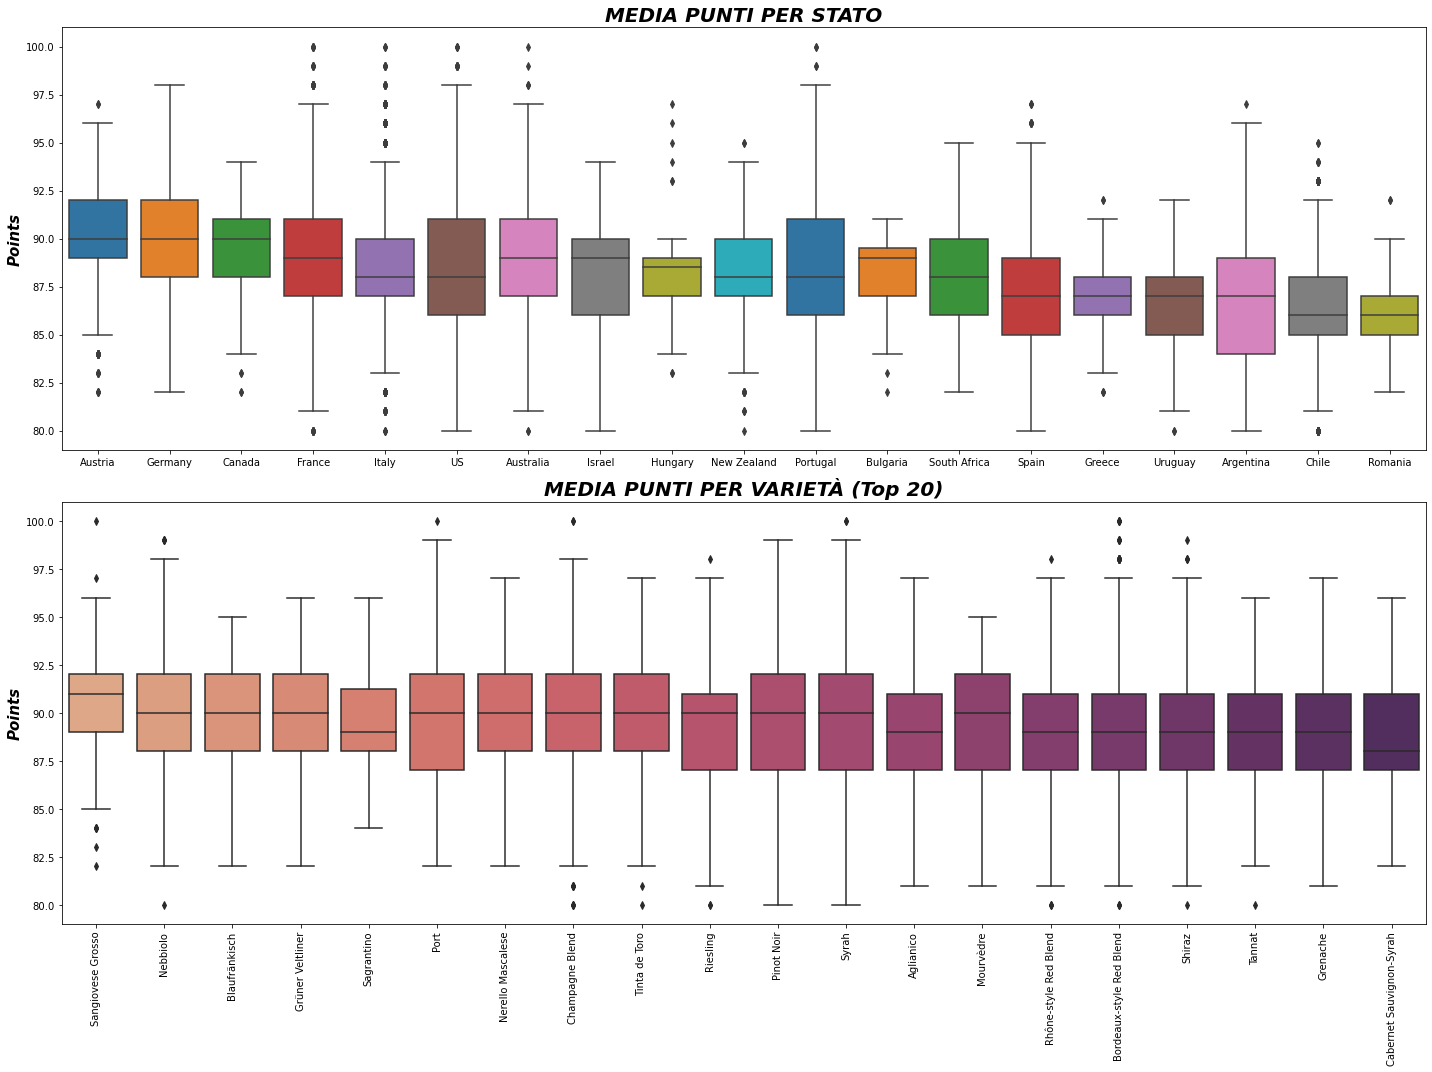

In [31]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,15))

df_country = pd.DataFrame({col:vals['points'] for col,vals in df.groupby('country')})
mean_country = df_country.mean().sort_values(ascending=False)

df_variety = pd.DataFrame({col:vals['points'] for col,vals in df.groupby('variety')})
mean_variety = df_variety.mean()
mean_variety.sort_values(ascending=False, inplace=True)

sns.boxplot(x='country',y='points', palette='tab10', data=df, order=mean_country.index, ax = ax1)
sns.boxplot(x='variety',y='points', palette='flare', data=df, order=mean_variety.index[:20], ax = ax2)

ax1.set_title('MEDIA PUNTI PER STATO', size=20, fontstyle='italic', weight=900)
ax1.set_xlabel(xlabel=None)
ax1.set_ylabel('Points', size=15, fontstyle='italic', weight=900)

ax2.set_title('MEDIA PUNTI PER VARIETÀ (Top 20)', size=20, fontstyle='italic', weight=900)
ax2.set_xlabel(xlabel=None)
ax2.set_ylabel('Points', size=15, fontstyle='italic', weight=900)

plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

>In entrambi le analisi la media dei punti per country e per varietà varia di poco

In [33]:
# media del prezzo relativa a country

df.groupby(['country'])['price'].mean().round(2).sort_values(ascending=False) 

country
Germany         42.36
France          42.00
Italy           40.93
US              36.75
Australia       35.24
Canada          33.88
Israel          31.52
Austria         30.60
Hungary         30.20
Spain           27.57
Uruguay         27.25
New Zealand     26.95
Portugal        26.45
South Africa    24.70
Argentina       24.06
Greece          23.76
Chile           20.55
Romania         15.47
Bulgaria        14.89
Name: price, dtype: float64

>Sul podio troviamo Germania, Francia e Italia <br>
>Mentre Chile, Romania, Bulgaria hanno prezzi mediamente più bassi

In [34]:
# media prezzo relativa alla varietà

df.groupby(['variety'])['price'].mean().round(2).sort_values(ascending=False)[:20]

variety
Champagne Blend                  70.98
Nebbiolo                         65.72
Sangiovese Grosso                65.63
Port                             64.68
Sagrantino                       53.13
Cabernet Sauvignon               48.01
Corvina, Rondinella, Molinara    47.91
Pinot Noir                       47.53
Bordeaux-style Red Blend         47.25
Tinta de Toro                    45.36
Sangiovese                       45.28
Shiraz                           41.73
Nerello Mascalese                41.14
Petit Verdot                     39.68
Syrah                            39.18
Aglianico                        38.89
Cabernet Sauvignon-Syrah         35.96
Red Blend                        35.96
Tempranillo Blend                35.90
Grenache                         35.72
Name: price, dtype: float64

>Le varietà con prezzi più alti sono Champagne Blend, Nebbiolo, Sangiovese Grosso

>Considerando la presenza di molti valori anomali, trasformiamo i valori della colonna price in scala logaritmica

In [35]:
df['price_log'] = np.log(df['price'])

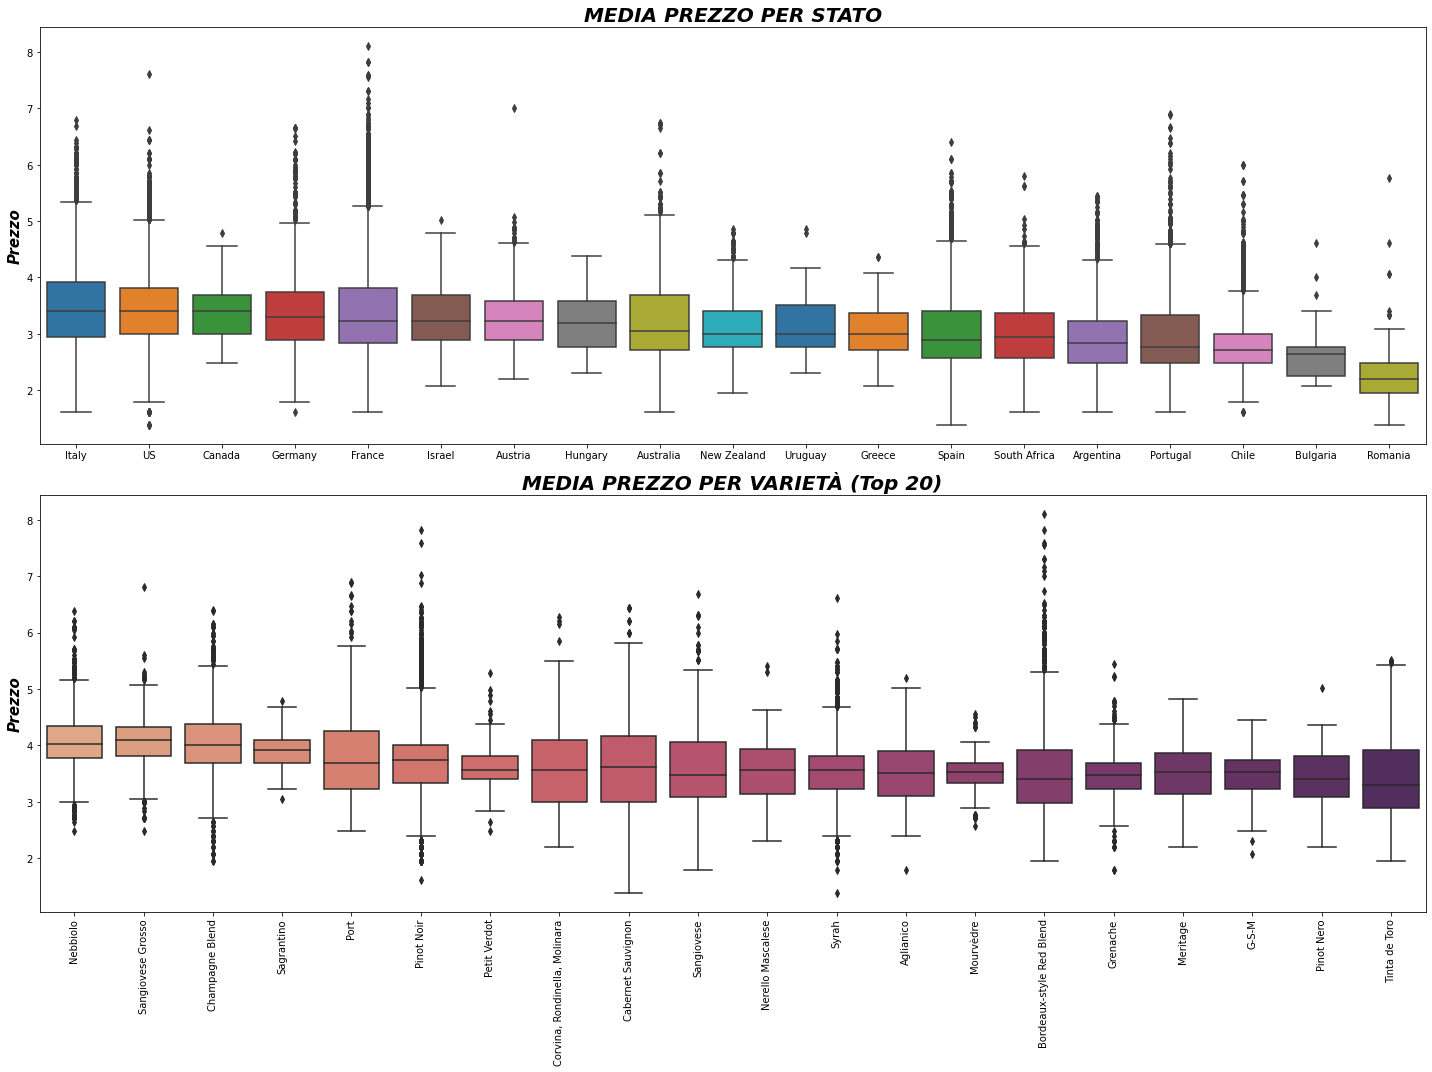

In [36]:
# visualizziamo ora la distribuzione dei dati relativi al prezzo

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,15))

df_country = pd.DataFrame({col:vals['price_log'] for col,vals in df.groupby('country')})
mean_country = df_country.mean().sort_values(ascending=False)

df_variety = pd.DataFrame({col:vals['price_log'] for col,vals in df.groupby('variety')})
mean_variety = df_variety.mean()
mean_variety.sort_values(ascending=False, inplace=True)

sns.boxplot(x='country',y='price_log', palette='tab10', data=df, order=mean_country.index, ax = ax1)
sns.boxplot(x='variety',y='price_log', palette='flare', data=df, order=mean_variety.index[:20], ax = ax2)

ax1.set_title('MEDIA PREZZO PER STATO', size=20, fontstyle='italic', weight=900)
ax1.set_xlabel(xlabel=None)
ax1.set_ylabel('Prezzo', size=15, fontstyle='italic', weight=900)

ax2.set_title('MEDIA PREZZO PER VARIETÀ (Top 20)', size=20, fontstyle='italic', weight=900)
ax2.set_xlabel(xlabel=None)
ax2.set_ylabel('Prezzo', size=15, fontstyle='italic', weight=900)

plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

# <center><b> STRATEGIA ASSORTIMENTO MARKETPLACE</b>

>Per la creazione del nostro marketplace dobbiamo scegliere quale tipo di vino tenere in magazzino  <br>

Per quanto riguarda il prezzo decidiamo di creare 3 segmenti:
- Prezzo fascia bassa fino a 50 
- Prezzo fascia media da 51 a 200 
- Prezzo fascia alta sopra i 200  <br>

>Prendiamo le 10 migliori varietà per punteggio di ogni nazione per ogni fascia di prezzo


In [38]:
# divisione df in 3 segmenti

df_low_price = df[df['price']<=50]
df_med_price = df[(df['price']>60) & (df['price']<201)]
df_high_price = df[df['price']>=201]

In [39]:
#10 migliori vini per ogni country in base al punteggio (low_price)

segment_1 = df_low_price.groupby(['country','variety'], as_index=False)['points'].max()
low_segment = segment_1.sort_values(['country', 'points'], ascending=[True, False]).groupby('country').head(10)
low_segment.reset_index(drop=True, inplace=True)
low_segment.head()

# low_segment.to_excel("low_price.xlsx")   per salvare il dataframe in un documento excel

,country,variety,points
0,Argentina,Bordeaux-style Red Blend,96
1,Argentina,Malbec,96
2,Argentina,Red Blend,95
3,Argentina,Cabernet Sauvignon,94
4,Argentina,Bonarda,92


In [40]:
segment_2 = df_med_price.groupby(['country','variety'], as_index=False)['points'].max()
med_segment = segment_2.sort_values(['country', 'points'], ascending=[True, False]).groupby('country').head(10)
med_segment.reset_index(drop=True, inplace=True)
med_segment.head()

# med_segment.to_excel("med_price.xlsx")

,country,variety,points
0,Argentina,Malbec,97
1,Argentina,Bordeaux-style Red Blend,95
2,Argentina,Merlot,94
3,Argentina,Red Blend,94
4,Argentina,Cabernet Franc,93


In [41]:
segment_3 = df_high_price.groupby(['country','variety'], as_index=False)['points'].max()
high_segment = segment_3.sort_values(['country', 'points'], ascending=[True, False]).groupby('country').head(10)
high_segment.reset_index(drop=True, inplace=True)
high_segment.head()

# high_segment.to_excel("high_price.xlsx")

,country,variety,points
0,Argentina,Malbec,95
1,Argentina,Cabernet Sauvignon,92
2,Australia,Muscat,100
3,Australia,Shiraz,99
4,Australia,Cabernet Sauvignon,95


In [44]:
# totale vini da tenere in magazzino

lo = len(low_segment)
me = len(med_segment)
hi = len(high_segment)

total_wine = lo+me+hi
print('Numero bottiglie in assortimento : ', total_wine)

Numero bottiglie in assortimento :  362


### <div style="text-align: right"> Sebastiano Fabbri </div>